In [1]:
# Parser for Passatuto data
import sys
sys.path.append('C:\\Users\\Gosia\\Desktop\\FDR-Metabolomics\\src\\passatuto_parser.py')
import passatuto_parser as pp

In [2]:
# Taking all the files from MassBankOrbi (queries) and parsing them to json objects
pre_spectrums_query = pp.PassatutoParser(r'C:\\Users\\Gosia\\Desktop\\MassbankOrbi').parse_folder()

processed 100 files
processed 200 files
processed 300 files
processed 400 files
Finished parsing of 457 spectra 


In [3]:
# Taking all files from Gnps_Noise_Filtered (library) and parsing them to json objects
pre_spectrums_lib = pp.PassatutoParser('C:\\Users\\Gosia\\Desktop\\Gnps_Noise_Filtered').parse_folder()

processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 files
processed 800 files
processed 900 files
processed 1000 files
processed 1100 files
processed 1200 files
processed 1300 files
processed 1400 files
processed 1500 files
processed 1600 files
processed 1700 files
processed 1800 files
processed 1900 files
processed 2000 files
processed 2100 files
processed 2200 files
processed 2300 files
processed 2400 files
processed 2500 files
processed 2600 files
processed 2700 files
processed 2800 files
processed 2900 files
processed 3000 files
processed 3100 files
processed 3200 files
processed 3300 files
processed 3400 files
processed 3500 files
processed 3600 files
processed 3700 files
processed 3800 files
processed 3900 files
processed 4000 files
Finished parsing of 4095 spectra 


In [4]:
# Using MatchMS to create spectra for both
from matchms.importing.load_from_json import as_spectrum
spectrums_query = []
for i, s in enumerate( pre_spectrums_query ):
    spectrums_query.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d', i)
spectrums_lib = []
for i, s in enumerate( pre_spectrums_lib ):
    spectrums_lib.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d', i)

processed %d 100
processed %d 200
processed %d 300
processed %d 400
processed %d 100
processed %d 200
processed %d 300
processed %d 400
processed %d 500
processed %d 600
processed %d 700
processed %d 800
processed %d 900
processed %d 1000
processed %d 1100
processed %d 1200
processed %d 1300
processed %d 1400
processed %d 1500
processed %d 1600
processed %d 1700
processed %d 1800
processed %d 1900
processed %d 2000
processed %d 2100
processed %d 2200
processed %d 2300
processed %d 2400
processed %d 2500
processed %d 2600
processed %d 2700
processed %d 2800
processed %d 2900
processed %d 3000
processed %d 3100
processed %d 3200
processed %d 3300
processed %d 3400
processed %d 3500
processed %d 3600
processed %d 3700
processed %d 3800
processed %d 3900
processed %d 4000


In [5]:
# Calculating cosine similarity for target-query match
from cosine_calc import get_hits
hits, misses = get_hits(spectrums_query, spectrums_lib, 1, cosine_tol=0.1)

In [6]:
# Loading the decoy database
pre_spectrums_decoys = pp.DecoyParserPassatuto(r'C:\\Users\\Gosia\\Desktop\\GnpsDecoyConditionalPeaks').parse_folder()
pre_spectrums_decoys_rand = pp.DecoyParserPassatuto(r'C:\\Users\\Gosia\\Desktop\\GnpsDecoyRandomPeaks').parse_folder()

print(len(pre_spectrums_decoys))

processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 files
processed 800 files
processed 900 files
processed 1000 files
processed 1100 files
processed 1200 files
processed 1300 files
processed 1400 files
processed 1500 files
processed 1600 files
processed 1700 files
processed 1800 files
processed 1900 files
processed 2000 files
processed 2100 files
processed 2200 files
processed 2300 files
processed 2400 files
processed 2500 files
processed 2600 files
processed 2700 files
processed 2800 files
processed 2900 files
processed 3000 files
processed 3100 files
processed 3200 files
processed 3300 files
processed 3400 files
processed 3500 files
processed 3600 files
processed 3700 files
processed 3800 files
processed 3900 files
processed 4000 files
Finished parsing of 4095 spectra 
processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 f

In [7]:
# Using MatchMS to create spectra decoy
decoys = []
for i, s in enumerate( pre_spectrums_decoys ):
    decoys.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d', i)

decoys_rand = []
for i, s in enumerate( pre_spectrums_decoys_rand ):
    decoys_rand.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d', i)


processed %d 100
processed %d 200
processed %d 300
processed %d 400
processed %d 500
processed %d 600
processed %d 700
processed %d 800
processed %d 900
processed %d 1000
processed %d 1100
processed %d 1200
processed %d 1300
processed %d 1400
processed %d 1500
processed %d 1600
processed %d 1700
processed %d 1800
processed %d 1900
processed %d 2000
processed %d 2100
processed %d 2200
processed %d 2300
processed %d 2400
processed %d 2500
processed %d 2600
processed %d 2700
processed %d 2800
processed %d 2900
processed %d 3000
processed %d 3100
processed %d 3200
processed %d 3300
processed %d 3400
processed %d 3500
processed %d 3600
processed %d 3700
processed %d 3800
processed %d 3900
processed %d 4000
processed %d 100
processed %d 200
processed %d 300
processed %d 400
processed %d 500
processed %d 600
processed %d 700
processed %d 800
processed %d 900
processed %d 1000
processed %d 1100
processed %d 1200
processed %d 1300
processed %d 1400
processed %d 1500
processed %d 1600
processed 

In [8]:

def add_pmz(specs):
    from rdkit.Chem import MolFromSmiles, MolToSmiles, MolFromInchi
    from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcMolFormula
    for s in specs:
        s.set('precursor_mz', s.get('parent_mass', 0))
        
add_pmz(spectrums_query)

In [9]:
# Calculating cosine similarity for target-decoy match
from cosine_calc import get_hits
hits_decoys, misses_decoys = get_hits(spectrums_query, decoys, 3, "precursor_mz", cosine_tol=0.1, decoys=True)
hits_decoys_rand, misses_decoys_rand = get_hits(spectrums_query, decoys_rand, 3, "precursor_mz", cosine_tol=0.1, decoys=True)


C:\Users\Gosia\anaconda3\envs\fdr-metab\lib\site-packages\matchms\similarity\spectrum_similarity_functions.py:72: RuntimeWarning: invalid value encountered in double_scalars
  score = score/(numpy.sqrt(numpy.sum(spec1_power**2)) * numpy.sqrt(numpy.sum(spec2_power**2)))


got nan for Acetochlor
got nan for Alachlor
got nan for Atenolol acid
got nan for Dextromethorphan
got nan for Dimethenamid OXA
got nan for Galaxolidone
got nan for Metoprolol
got nan for Moclobemide
got nan for Napropamid
got nan for Sotalol
got nan for Thiacloprid-amide
got nan for 10,11-trans-Dihydroxy-10,11-dihydrocarbamazepine
got nan for Adenosine
got nan for Apomorphine
got nan for Genistein


In [10]:
print(len(hits),len(misses))
print(len(hits_decoys),len(misses_decoys))
print(len(hits_decoys_rand),len(misses_decoys_rand))

362 284
375 83
375 83


In [11]:
# Calculating true q-value scores
from q_value_calc import calculate_q_value
q_list_true = calculate_q_value(hits)

In [12]:
# Calculating estimated q-value scores
q_list_estimated = calculate_q_value(hits+hits_decoys,True)
q_list_estimated_rand = calculate_q_value(hits+hits_decoys_rand,True)
print(q_list_estimated)

[(0, True, 0.9277338131401497), (0.0, True, 0.9178586467476109), (0.0, True, 0.8968967400445442), (0.0, True, 0.8753596956697863), (0.14285714285714285, 'decoy', 0.870600609959416), (0.14285714285714285, True, 0.844044967572292), (0.14285714285714285, False, 0.8132432846286978), (0.19230769230769232, 'decoy', 0.8108462944321183), (0.19230769230769232, False, 0.8101416058129177), (0.19230769230769232, True, 0.8067385925897322), (0.19230769230769232, 'decoy', 0.8014953862201359), (0.19230769230769232, True, 0.7999253262058288), (0.19230769230769232, True, 0.7964150907148216), (0.19230769230769232, 'decoy', 0.7919002748136683), (0.19230769230769232, True, 0.7883416739030162), (0.19230769230769232, False, 0.7832666494851127), (0.19230769230769232, True, 0.7683539644958313), (0.19230769230769232, 'decoy', 0.7674201428099866), (0.19230769230769232, True, 0.7625944052417546), (0.19230769230769232, False, 0.7587687714906156), (0.19230769230769232, True, 0.7534840919333287), (0.1923076923076923

In [13]:
print(hits_decoys)

[Hit(query=<matchms.Spectrum.Spectrum object at 0x0000029E80FFBAF0>, target=<matchms.Spectrum.Spectrum object at 0x0000029E912CBA00>, score=0.13636038667001837, hit='decoy'), Hit(query=<matchms.Spectrum.Spectrum object at 0x0000029E80FFBBE0>, target=<matchms.Spectrum.Spectrum object at 0x0000029E9104A1C0>, score=0.41470936712300527, hit='decoy'), Hit(query=<matchms.Spectrum.Spectrum object at 0x0000029E80FFBC70>, target=<matchms.Spectrum.Spectrum object at 0x0000029E9130C6A0>, score=0.3398556102335297, hit='decoy'), Hit(query=<matchms.Spectrum.Spectrum object at 0x0000029E80FFBEB0>, target=<matchms.Spectrum.Spectrum object at 0x0000029E90FDD160>, score=0.2000903272941916, hit='decoy'), Hit(query=<matchms.Spectrum.Spectrum object at 0x0000029E8A242D00>, target=<matchms.Spectrum.Spectrum object at 0x0000029E91040400>, score=0.2751954270131314, hit='decoy'), Hit(query=<matchms.Spectrum.Spectrum object at 0x0000029E8A242C40>, target=<matchms.Spectrum.Spectrum object at 0x0000029E90FC73A0>,

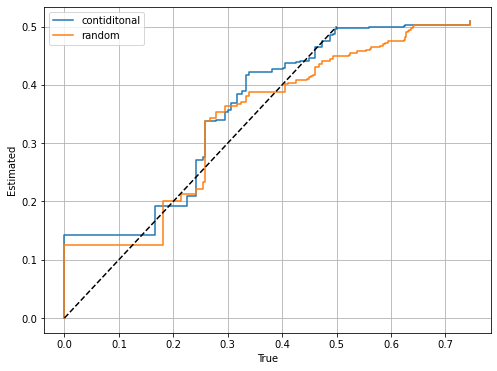

In [14]:
# plot estimated and true q-values
def combine_true_est(q_val_true,q_val_est):
    res = []
    q_idx = 0
    for q_e, _, score in q_val_est:
        while q_idx < len(q_val_true)-1 and q_val_true[q_idx+1][2] >= score:
            q_idx += 1
        res.append((score, q_val_true[q_idx][0], q_e))
    return res
        
scores, trues, estimateds = zip(*combine_true_est(q_list_true, q_list_estimated))
scores_rand, trues_rand, estimateds_rand = zip(*combine_true_est(q_list_true, q_list_estimated_rand))

import plot_q_vals
plot_q_vals.plot_q_vals( {'contiditonal':(trues,estimateds), 'random':(trues_rand,estimateds_rand)} )

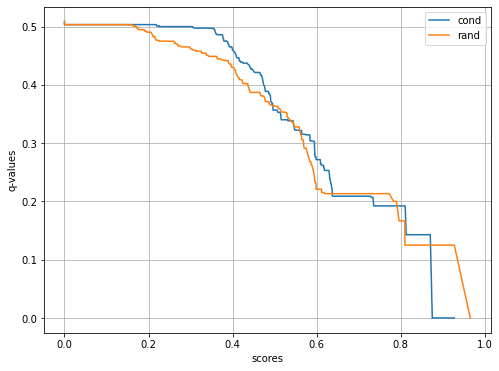

In [15]:
import pylab as plt

plt.figure(figsize=(8,6))
plt.plot(scores, estimateds, label='cond')
plt.plot(scores_rand, estimateds_rand, label='rand')
#plt.plot(scores_rand, trues_rand, label='trues')
plt.xlabel('scores')
plt.ylabel('q-values')
plt.legend()
plt.grid()

In [16]:
# this cell is just loading their cosine similarity and saving them by the query compound name
cosine_scores = open(r'C:\Users\Gosia\Desktop\q_values\MassbankOrbi-Gnps.txt', 'r').readlines() 
query_scores = {}
for line in cosine_scores[1:]:
    q,t,ti,s = line.split("\t") # q for query, t for target, ti for target inchi, s for score
    query_scores[q] = (float(s),t,ti)
    

In [17]:
# useful for visualisation of cosine differences
same = 0
different = 0
for hit in hits:
    if hit.target.get('compound_name') == query_scores[hit.query.get('compound_name')][1]:
        same += 1
    else:
        different += 1
    print('\t'.join((hit.query.get('compound_name'),hit.target.get('compound_name'), query_scores[hit.query.get('compound_name')][1], str(hit.score), str(query_scores[hit.query.get('compound_name')][0]))))
print(same, different)  

DErySphingosine	C18_Sphingosine	C18_Sphingosine	0.9277338131401497	0.8232295929697477
Prednisolone	Prednisolone	Prednisolone	0.9178586467476109	0.927530390141308
Hydrochlorothiazide	58-93-5	58-93-5	0.8968967400445442	0.8491576140089205
Clotrimazole	CLOTRIMAZOLE	CLOTRIMAZOLE	0.8753596956697863	0.7911624344085376
Methylprednisolone	Methylprednisolone	Methylprednisolone	0.844044967572292	0.9175689084373738
Quercetin	Ellagic acid	MLS002153851-01!2-(3,4-dihydroxyphenyl)-3,5,7-trihydroxy-4H-chromen-4-one dihydrate117-39-5	0.8132432846286978	0.6399952123966156


KeyError: 'Arginine'

# Below is my attempt at Grid-Searching the cosine-tolerance parameter
# For each of the chosen tolerance-candidates, I see:
# 1) how many queries result in the same target by choosing the highest score
# 2) what is the average cosine-similarity difference between our scores and their, given the same query & target

In [ ]:
from matchms.similarity import CosineGreedy
from rdkit.Chem.inchi import InchiToInchiKey, MolToInchiKey
import bisect
from collections import namedtuple

Hit = namedtuple('Hit', ['query', 'target', 'score', 'hit'])


def inchis_equal(s1, s2):
    return s1.metadata['inchi'].split("/")[:4] == s2.metadata['inchi'].split("/")[:4]
    # return InchiToInchiKey(s1.metadata['inchi']).split('-')[0] == InchiToInchiKey(s2.metadata['inchi']).split('-')[0]


def get_hits_2(query_spec, library_spec, precursor_tol=1, metaKey='parent_mass', cosine_tol=0.1):
    cosine_greedy = CosineGreedy(tolerance=cosine_tol)
    library_spec.sort(key=lambda x: x.metadata[metaKey])
    hits = []
    misses = []
    library_prec_list = [x.metadata[metaKey] for x in library_spec]
    for q in query_spec:
        if metaKey not in q.metadata:
            continue
        min_mz = q.metadata[metaKey] - precursor_tol
        max_mz = q.metadata[metaKey] + precursor_tol
        pos = bisect.bisect_right(library_prec_list, min_mz)
        pos2 = pos
        while pos2 < len(library_prec_list) and library_prec_list[pos2] < max_mz:
            pos2 += 1
        if pos == pos2:
            # nothing in precursor range
            misses.append(q)
        else:
            scores = []
            for l in library_spec[pos:pos2]:
                s, _ = cosine_greedy.pair(q, l)
                scores.append((s, l))
            # if all( s[0] == 0.0 for s in scores ):
            #    print(q.get('compound_name'))
            for score in scores:
                hits.append(Hit(q, score[1], score[0], inchis_equal(q, score[1])))
    return hits, misses


In [ ]:
tolerances = [ 0.0, 0.001, 0.005, 0.01, 0.02, 0.08, 0.1, 0.12, 0.2, 0.4, 0.75, 0.9, 1.0, 1.1, 1.3, 1.5, 2.0 ]
for tolerance in tolerances:
    hit_count = 0
    hits, _ = get_hits(spectrums_query, spectrums_lib, cosine_tol=tolerance)    
    for hit in hits:
        if hit.target.get('compound_name') == query_scores.get(hit.query.get('compound_name'), ['',''])[1]:
            hit_count += 1

    score_diff = 0.0
    hits_2, _ = get_hits_2(spectrums_query, spectrums_lib, cosine_tol=tolerance)    
    for hit in hits_2:
        if hit.target.get('compound_name') == query_scores.get(hit.query.get('compound_name'), ['',''])[1]:
            score_diff += abs(hit.score - query_scores.get(hit.query.get('compound_name'))[0])
    
    print( tolerance, hit_count, score_diff/192 )

In [ ]:
print(spectrums_query[0].get_peaks_array())

In [ ]:
# spectrum objects have a `peaks` attribute. First item is a list of mz and second a list of intensities

In [ ]:
import numpy as np

In [ ]:
class Peak(object):
    def __init__(self, mz, intensity):
        self.mz = mz
        self.intensity = intensity

def spec2peaks(spec):
    peaks = []
    for i,mz in enumerate(spec.peaks[0]):
        intensity = spec.peaks[1][i]
        peaks.append(Peak(mz, intensity))
    return peaks

def find_matches(peaks1, peaks2, ms2_tol):
    # find all the peaks in peaks that are within tol
    matches = []
    for p1 in peaks1:
        for p2 in peaks2:
            if abs(p1.mz - p2.mz) < ms2_tol:
                matches.append((p1,p2,p1.intensity*p2.intensity))
    matches.sort(key = lambda x: x[2], reverse = True)
    return matches
    
def normalise_peaks(peaks):
    max_intensity = max([p.intensity for p in peaks])
    new_peaks = []
    for peak in peaks:
        new_peaks.append(Peak(peak.mz, peak.intensity / max_intensity))
    return new_peaks

def greedy_cosine(spec1, spec2, ms2_tol=0.2, normalise = False):
    peaks1 = spec2peaks(spec1)
    peaks2 = spec2peaks(spec2)

    if normalise:
        peaks1 = normalise_peaks(peaks1)
        peaks2 = normalise_peaks(peaks2)


    
    matches = find_matches(peaks1, peaks2, ms2_tol)
    
    
    length1 = sum([p.intensity**2 for p in peaks1])
    length2 = sum([p.intensity**2 for p in peaks2])
    
    used = set()
    cos = 0
    n_matches = 0
    for p1, p2, i_prod in matches:
        if not p1 in used and not p2 in used:
            cos += i_prod
            used.add(p1)
            used.add(p2)
            n_matches += 1
    result = (n_matches, cos/(np.sqrt(length1)*np.sqrt(length2)))
    return result

def pass_cosine(spec1, spec2, ms2_tol=0.2, normalise = False):
    peaks1 = spec2peaks(spec1)
    peaks2 = spec2peaks(spec2)
    
    if normalise:
        peaks1 = normalise_peaks(peaks1)
        peaks2 = normalise_peaks(peaks2)

    length1 = sum([p.intensity**2 for p in peaks1])
    length2 = sum([p.intensity**2 for p in peaks2])


    n_matches = 0
    cos = 0
    for p1 in peaks1:
        best_match = None
        for p2 in peaks2:
            if abs(p1.mz - p2.mz) < ms2_tol:
                if best_match is None:
                    best_match = p2
                elif p2.intensity > best_match.intensity:
                    print('more than one peak')
                    best_match = p2
        if best_match is not None:
            n_matches += 1
            cos += p1.intensity * best_match.intensity
    
    result = (n_matches, cos/(np.sqrt(length1)*np.sqrt(length2)))
    return result

    
print(greedy_cosine(spectrums_query[1], spectrums_query[1], normalise=True))
print(pass_cosine(spectrums_query[1], spectrums_query[1]))